In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split,  GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [2]:
#import the data

data = pd.read_csv("data/train.csv")
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


## Column Descriptions:
---
- **Gender**: Gender of the passengers (Female, Male)

- **Customer Type**: The customer type (Loyal customer, disloyal customer)

- **Age**: The actual age of the passengers

- **Type of Travel**: Purpose of the flight of the passengers (Personal Travel, Business Travel)

- **Class**: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

- **Flight distance**: The flight distance of this journey

- **Inflight wifi service**: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

- **Departure/Arrival time convenient**: Satisfaction level of Departure/Arrival time convenient

- **Ease of Online booking**: Satisfaction level of online booking

- **Gate location**: Satisfaction level of Gate location

- **Food and drink**: Satisfaction level of Food and drink

- **Online boarding**: Satisfaction level of online boarding

- **Seat comfort**: Satisfaction level of Seat comfort

- **Inflight entertainment**: Satisfaction level of inflight entertainment

- **On-board service**: Satisfaction level of On-board service

- **Leg room service**: Satisfaction level of Leg room service

- **Baggage handling**: Satisfaction level of baggage handling

- **Check-in service**: Satisfaction level of Check-in service

- **Inflight service**: Satisfaction level of inflight service

- **Cleanliness**: Satisfaction level of Cleanliness

- **Departure Delay in Minutes**: Minutes delayed when departure

- **Arrival Delay in Minutes**: Minutes delayed when Arrival

- **Satisfaction**: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

# Data Cleaning
---
- Drop unnecessary columns: Unnamed, id
- Format columns to use conventional python coding. Words should be lower-case and use snake case. 
- Remove rows with NaN values.
- Rename elements in 'Customer Type' for easier comprehension.
- Rename certain columns for easier comprehension. 
- The survey rows that contain satisfaction scores of 0 will be removed. 
    - The customer most likely did not indicate the score for that particular category. 
- Columns, Departure Delay in Minutes and Arrival Delay in Minutes will be combined into a column called Total Delay. 
- Our target variable will be changed from an object data type to a numerical data type. 

### Drop Columns: Unnamed, id

- Unnamed and id are not necessary for our analysis. Therefore, I will remove them from the dataset. 

In [3]:
data = data.drop(['Unnamed: 0', 'id'], axis=1)
data.head(1)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied


### Rename Columns

- Next I will rename the columns to follow the conventional python developer format. 
    - lowercase and snake case.  

In [4]:
# Function to convert strings to snake case 
def snake_case(string):
    return string.lower().replace(' ', '_')

#rename columsn to lower case using snake case
for column in data.columns:
    data = data.rename(columns={column: snake_case(column)})

In [5]:
#Call info() method to check columns names, dtypes, and number of records 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   gender                             103904 non-null  object 
 1   customer_type                      103904 non-null  object 
 2   age                                103904 non-null  int64  
 3   type_of_travel                     103904 non-null  object 
 4   class                              103904 non-null  object 
 5   flight_distance                    103904 non-null  int64  
 6   inflight_wifi_service              103904 non-null  int64  
 7   departure/arrival_time_convenient  103904 non-null  int64  
 8   ease_of_online_booking             103904 non-null  int64  
 9   gate_location                      103904 non-null  int64  
 10  food_and_drink                     103904 non-null  int64  
 11  online_boarding                    1039

### Check For Missing Values

In [6]:
data.isna().sum()

gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
class                                  0
flight_distance                        0
inflight_wifi_service                  0
departure/arrival_time_convenient      0
ease_of_online_booking                 0
gate_location                          0
food_and_drink                         0
online_boarding                        0
seat_comfort                           0
inflight_entertainment                 0
on-board_service                       0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
inflight_service                       0
cleanliness                            0
departure_delay_in_minutes             0
arrival_delay_in_minutes             310
satisfaction                           0
dtype: int64

- It appears that we have **310** NaN values from the arrival_delay_in_minutes column. 
- 310 is not enough missing values to effect my analysis of the data. 
- The next step I will delete the 310 records with missing data. 

In [7]:
missing_arrival_delay = data[data['arrival_delay_in_minutes'].isna()]
missing_arrival_delay.head()

,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
213,Female,Loyal Customer,38,Business travel,Eco,109,5,3,3,3,5,5,5,5,5,2,4,1,1,5,31,NaN,satisfied
1124,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,3,4,4,3,4,4,4,4,4,3,3,4,38,NaN,neutral or dissatisfied
1529,Male,Loyal Customer,39,Business travel,Business,733,2,5,5,5,2,4,3,2,2,2,2,2,2,3,11,NaN,neutral or dissatisfied
2004,Female,disloyal Customer,26,Business travel,Business,1035,3,3,3,1,2,3,2,2,3,3,4,5,5,2,41,NaN,neutral or dissatisfied
2108,Female,Loyal Customer,24,Personal Travel,Eco,417,2,1,2,2,5,2,5,5,1,4,2,1,2,5,1,NaN,neutral or dissatisfied


#### Drop Records With Missing Data

In [8]:
data.dropna(axis=0, inplace=True)

In [9]:
# Check to see if missing data records have been removed. 
data.isna().sum()

gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
class                                0
flight_distance                      0
inflight_wifi_service                0
departure/arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
on-board_service                     0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
satisfaction                         0
dtype: int64

#### Rename 'customer_type' Elements

In [10]:
data['customer_type'] = data['customer_type'].map({'Loyal Customer':'Returning Customer', 
                                                   'disloyal Customer':'First-time Customer'})

#### Rename column names

In [11]:
data = data.rename(columns={'leg_room_service':'leg_room', 
                            'departure/arrival_time_convenient':'departure/arrival_time_convenience'})

In [12]:
# Check to see if changes have been made to the dataframe
data

,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenience,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,Male,Returning Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,First-time Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Returning Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Returning Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Returning Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,First-time Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Returning Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,First-time Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,First-time Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


#### Remove rows where the customers did not indicate a satisfaction score
- Scores for these columns should be between 1-5, not 0. 

In [13]:
data = data[(data['inflight_wifi_service']!=0) & (data['departure/arrival_time_convenience']!=0) & 
           (data['ease_of_online_booking']!=0) & (data['gate_location']!=0) & (data['food_and_drink']!=0) &
           (data['online_boarding']!=0) & (data['seat_comfort']!=0) & (data['inflight_entertainment']!=0) &
           (data['on-board_service']!=0) & (data['leg_room']!=0) & (data['checkin_service']!=0) & 
           (data['inflight_service']!=0) & (data['cleanliness']!=0)]

#### Map target variable, satisfaction column, to contain 0 and 1
- Currently the satisfaction column is made up of two elements of the object data type.  I am going to map them to 0 and 1 for modeling purposes. 
- **neutral or dissatisfied = 0**
- **satisfied = 1**

In [14]:
data['satisfaction'] = data['satisfaction'].map({'neutral or dissatisfied' : 0, 'satisfied' : 1})

#### Combine columns (departure_delay_in_minutes and arrival_delay_in_minutes) to make total_delay_in_minutes
- The column departure_delay_in_minutes is set as an int data type where as the arrival_delay_in_minutes is in float data type. 
- Before combining the two columns together, I will first change the data type of departure_delay_in_minutes to a float data type. 

In [15]:
data['departure_delay_in_minutes'] = data['departure_delay_in_minutes'].astype('float')

In [16]:
data['total_delay_in_minutes'] = data['departure_delay_in_minutes'] + data['arrival_delay_in_minutes']

#### Drop columns 'departure_delay_in_minutes' and 'arrival_delay_in_minutes'
- Since I created a new column combining the two columns, leaving them in my dataframe is not necessary. 

In [17]:
data = data.drop(['departure_delay_in_minutes', 'arrival_delay_in_minutes'], axis=1)

In [18]:
# Check dataframe for changes 
data

,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenience,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room,baggage_handling,checkin_service,inflight_service,cleanliness,satisfaction,total_delay_in_minutes
0,Male,Returning Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,0,43.0
1,Male,First-time Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,0,7.0
2,Female,Returning Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,1,0.0
3,Female,Returning Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,0,20.0
4,Male,Returning Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,First-time Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,0,3.0
103900,Male,Returning Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,1,0.0
103901,Male,First-time Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,0,21.0
103902,Female,First-time Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0


## EDA: Exploratory Data Analysis

- I will first explore the categorical columns, to check their distributions.
- Then I will label encode them to convert them to a numerical data type for modeling. 

### Show The Unique Values of Each Column

In [19]:
for col in data.columns:
    print(f'Column: {col}')
    
    print(data[col].unique())

Column: gender
['Male' 'Female']
Column: customer_type
['Returning Customer' 'First-time Customer']
Column: age
[13 25 26 61 47 52 41 20 24 12 53 33 45 38  9 17 43 58 57 49 36 22 31 15
 35 67 37 40 34 39 50 29 54 21 28 27 69 60 23 48 59 46 30 66 64 44 51 32
 19 42 16 11 62  8 56 68 18 55 65 72 70 63 10  7 14 80 74 71 85 73 76 77
 75 79 78]
Column: type_of_travel
['Personal Travel' 'Business travel']
Column: class
['Eco Plus' 'Business' 'Eco']
Column: flight_distance
[ 460  235 1142 ...  974 1479  400]
Column: inflight_wifi_service
[3 2 4 1 5]
Column: departure/arrival_time_convenience
[4 2 5 3 1]
Column: ease_of_online_booking
[3 2 5 4 1]
Column: gate_location
[1 3 2 5 4]
Column: food_and_drink
[5 1 2 4 3]
Column: online_boarding
[3 5 2 1 4]
Column: seat_comfort
[5 1 2 3 4]
Column: inflight_entertainment
[5 1 2 3 4]
Column: on-board_service
[4 1 2 3 5]
Column: leg_room
[3 5 4 2 1]
Column: baggage_handling
[4 3 5 1 2]
Column: checkin_service
[4 1 3 5 2]
Column: inflight_service
[5 4 3 1

### Satisfaction

- The image below shows the distribution of surveys completed with being labeled as satisfied or dissatisfied. 
- It appears more people were willing to complete the survey because they were dissatisfied with their travel experience. 

In [20]:
print("Satisfaction Counts")
print(data['satisfaction'].value_counts())
print()
print("Percentages")
print(data["satisfaction"].value_counts(normalize=True))

Satisfaction Counts
0    54777
1    40638
Name: satisfaction, dtype: int64

Percentages
0    0.574092
1    0.425908
Name: satisfaction, dtype: float64


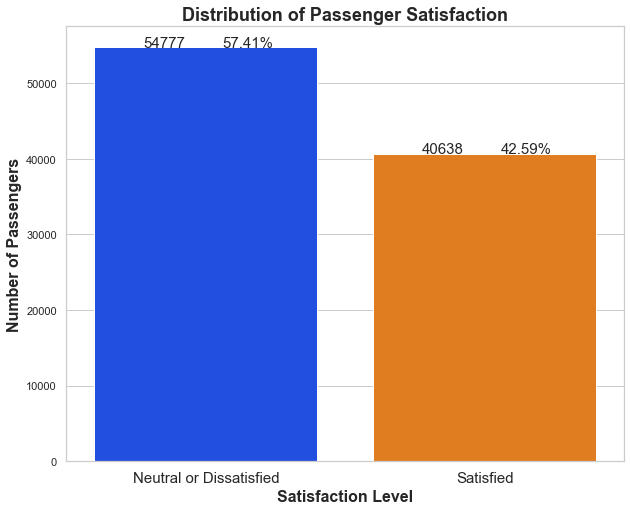

In [21]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
ax = sns.countplot(x='satisfaction', data=data, palette='bright')
plt.title('Distribution of Passenger Satisfaction', fontweight='bold', fontsize='18')
plt.xlabel('Satisfaction Level', fontweight='bold', fontsize='16')
plt.ylabel('Number of Passengers', fontweight='bold', fontsize='16')
ax.set_xticklabels(['Neutral or Dissatisfied', 'Satisfied'], fontsize='15')

# Add count and percentage labels next to each bar
total = float(len(data['satisfaction']))
for i, count in enumerate(data['satisfaction'].value_counts()):
    percentage = '{:.2f}%'.format((count/total) * 100)
    ax.text(i-0.15, count+50, str(count), ha='center', fontsize='15')
    ax.text(i+0.15, count+50, percentage, ha='center', fontsize='15')
    
plt.savefig('images/satisfaction.png', format='png')

plt.show()



#Reference for count and percentage labels
#https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-grouped-bars

- **Check for imbalance**: With the the data being split 57:43 between dissatisfied and satisfied, there is no need for any special resampling techniques to balance the data. 

### Gender

- Below I used a stacked bar chart to visualize the gender distribution and compared satisfaction levels between male and female passengers. 
- The distribution between male and female passengers in the dataset are nearly even. 

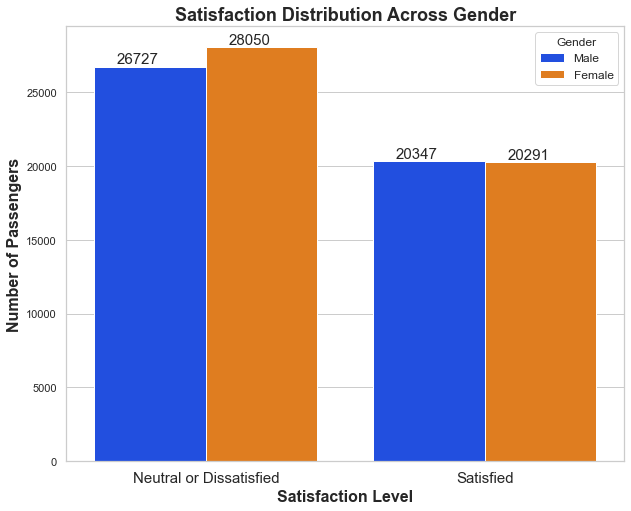

In [22]:
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(10,8))

sns.countplot(x='satisfaction', hue='gender', data=data, palette='bright', ax=ax)

ax.set_xlabel('Satisfaction Level', fontsize='16', fontweight='bold')
ax.set_ylabel('Number of Passengers', fontsize='16', fontweight='bold')

#change the names of the xaxis labels
ax.set_xticklabels(['Neutral or Dissatisfied', 'Satisfied'], fontsize='15')

#add counts to the top of each column
for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.08, p.get_height()+200), fontsize='15')
ax.set_title('Satisfaction Distribution Across Gender', fontsize=18, fontweight='bold')
ax.legend(title='Gender', title_fontsize='12', fontsize='12')

plt.savefig('images/gender.png', format='png')

plt.show()



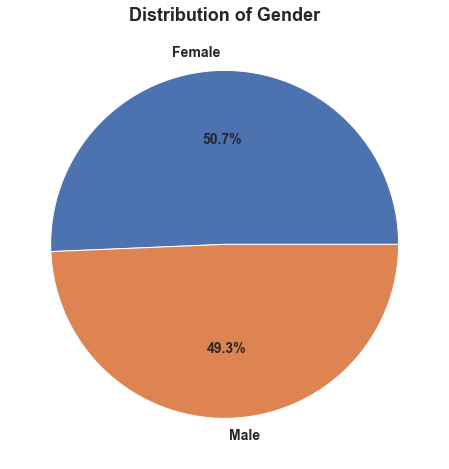

In [23]:
# Calculate the percentage of each category
counts = data['gender'].value_counts(normalize=True) * 100

# Create a pie chart
plt.figure(figsize=(8,8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', textprops={'fontweight':'bold', 'fontsize': 14})
plt.title('Distribution of Gender', fontweight='bold', fontsize='18')
plt.show()

- There appears to be nearly a perfect distribution of surveys completed by men and women. 

### Customer Type
- Next I will take a look at the distribution of satisfaction levels across the two customer types.
- It is evident that more passengers completing the satisfaction survey were not satisfied with their travel experience. However there is a larger percentage of dissatisfied passengers amongst the first time customers. 
    - This makes sense because if a passenger had a poor experience in the past, it is likely they wouldn't be returning customers. 
- First-time customers probably won't take the time to fill out the survey in most cases, and will just not ride with this airline in the future. 

In [24]:
customer_group = data.groupby(['satisfaction', 'customer_type'])['customer_type'].count()
customer_group

satisfaction  customer_type      
0             First-time Customer    12584
              Returning Customer     42193
1             First-time Customer     2758
              Returning Customer     37880
Name: customer_type, dtype: int64

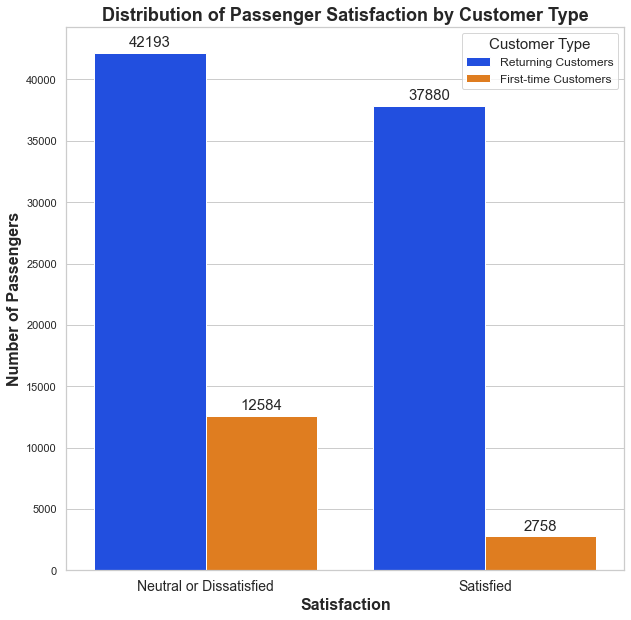

In [25]:
sns.set_style('whitegrid')

plt.figure(figsize=(10, 10))

ax = sns.countplot(x='satisfaction', hue='customer_type', data=data, palette='bright')

plt.title('Distribution of Passenger Satisfaction by Customer Type', fontweight='bold', fontsize='18')
plt.xlabel('Satisfaction', fontweight='bold', fontsize='16')
plt.ylabel('Number of Passengers', fontweight='bold', fontsize='16')
ax.set_xticklabels(['Neutral or Dissatisfied', 'Satisfied'], fontsize=14)

# Add count values to the top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize='15')

# Increase the size of the legend and its labels
plt.legend(fontsize='14', title_fontsize='16')

# Change the labels of the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Returning Customers', 'First-time Customers'], fontsize='12', title='Customer Type', title_fontsize='15')

plt.savefig('images/customer_type.png', format='png')

plt.show();



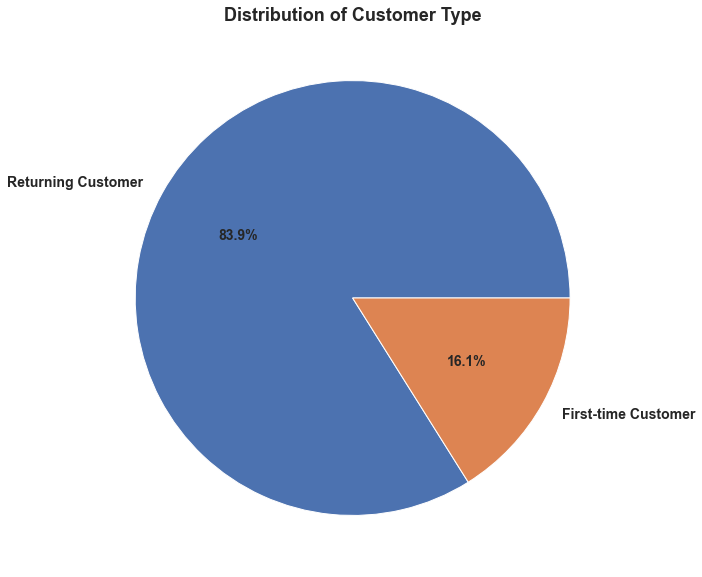

In [26]:
# Calculate the percentage of each category
counts = data['customer_type'].value_counts(normalize=True) * 100

# Create a pie chart
plt.figure(figsize=(10,10))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', textprops={'fontweight':'bold', 'fontsize': 14})
plt.title('Distribution of Customer Type', fontweight='bold', fontsize='18')
plt.show()

- I found it interesting that returning customers makes up the majority of returned surveys. Returning customers are making an effort to improve the experience of their favorite airline to travel with. 

### Type of Travel
- **Type of Travel**: Purpose of the flight of the passengers (Personal Travel, Business Travel)
- For business travel, the passenger's tickets are normally paid for by the company, and come with more accomodations and amenities.
- Personal travel usually means that the price of travel comes out of the pocket of the person traveling.  

In [27]:
type_group = data.groupby(['satisfaction', 'type_of_travel'])['type_of_travel'].count()
type_group

satisfaction  type_of_travel 
0             Business travel    27765
              Personal Travel    27012
1             Business travel    38161
              Personal Travel     2477
Name: type_of_travel, dtype: int64

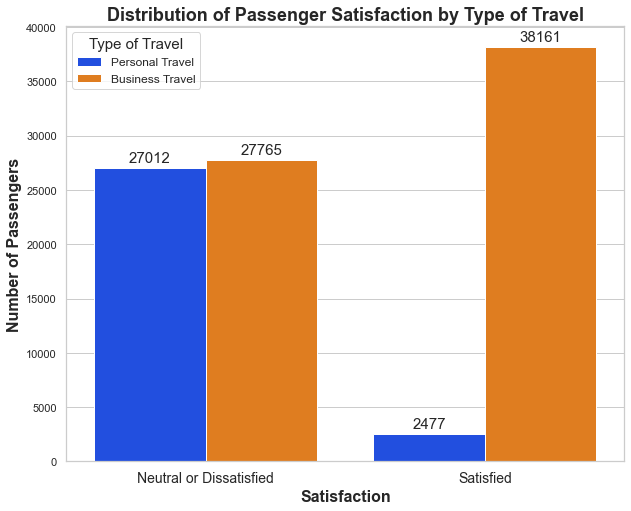

In [28]:
sns.set_style('whitegrid')

plt.figure(figsize=(10, 8))

ax = sns.countplot(x='satisfaction', hue='type_of_travel', data=data, palette='bright')

plt.title('Distribution of Passenger Satisfaction by Type of Travel', fontweight='bold', fontsize='18')
plt.xlabel('Satisfaction', fontweight='bold', fontsize='16')
plt.ylabel('Number of Passengers', fontweight='bold', fontsize='16')
ax.set_xticklabels(['Neutral or Dissatisfied', 'Satisfied'], fontsize=14)

# Add count values to the top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize='15')

# Increase the size of the legend and its labels
plt.legend(fontsize='14', title_fontsize='16')

# Change the labels of the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Personal Travel', 'Business Travel'], fontsize='12', title='Type of Travel', title_fontsize='15')

plt.savefig('images/type_of_travel.png', format='png')

plt.show();


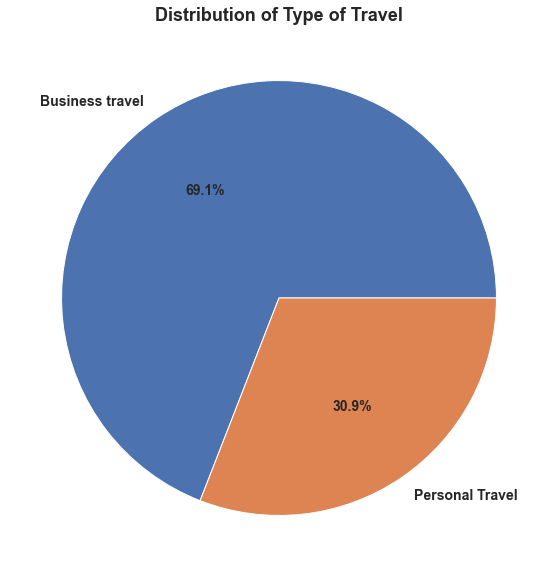

In [29]:
# Calculate the percentage of each category
counts = data['type_of_travel'].value_counts(normalize=True) * 100

# Create a pie chart
plt.figure(figsize=(10,10))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', textprops={'fontweight':'bold', 'fontsize': 14})
plt.title('Distribution of Type of Travel', fontweight='bold', fontsize='18')
plt.show()

### Class
- It is clear that amongst the completed surveys of satisfied passengers, the majority come from the business class. 
- The clear majority of neutral or dissatisfied passengers were flying in the eco class. 

In [30]:
class_group = data.groupby(['satisfaction', 'class'])['class'].count()
class_group

satisfaction  class   
0             Business    14599
              Eco         34831
              Eco Plus     5347
1             Business    31736
              Eco          7272
              Eco Plus     1630
Name: class, dtype: int64

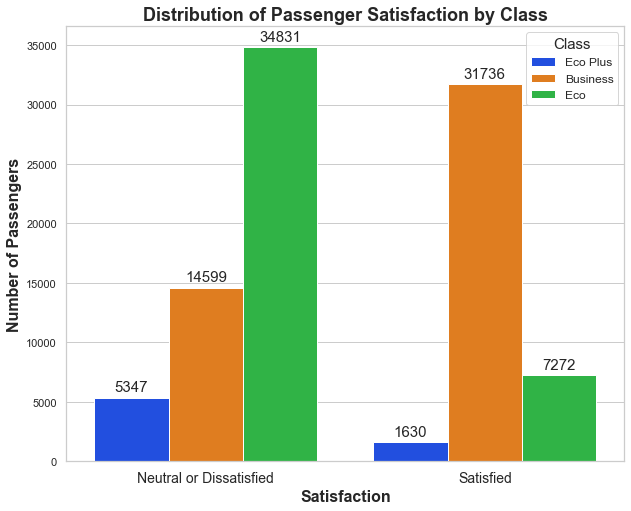

In [31]:
sns.set_style('whitegrid')

plt.figure(figsize=(10, 8))

ax = sns.countplot(x='satisfaction', hue='class', data=data, palette='bright')

plt.title('Distribution of Passenger Satisfaction by Class', fontweight='bold', fontsize='18')
plt.xlabel('Satisfaction', fontweight='bold', fontsize='16')
plt.ylabel('Number of Passengers', fontweight='bold', fontsize='16')
ax.set_xticklabels(['Neutral or Dissatisfied', 'Satisfied'], fontsize=14)

# Add count values to the top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize='15')

# Increase the size of the legend and its labels
plt.legend(fontsize='14', title_fontsize='16')

# Change the labels of the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Eco Plus', 'Business', 'Eco'], fontsize='12', title='Class', title_fontsize='15')

plt.savefig('images/class.png', format='png')

plt.show();

### Age
- The graph below shows the number of satisfied and neutral or dissatisfied airline passengers broken down by age. 
- It is interesting that from ages 39 - 60 passengers were satisfied with their experience. However, outside of that age range, there were more dissatisfied passengers than satisfied. 

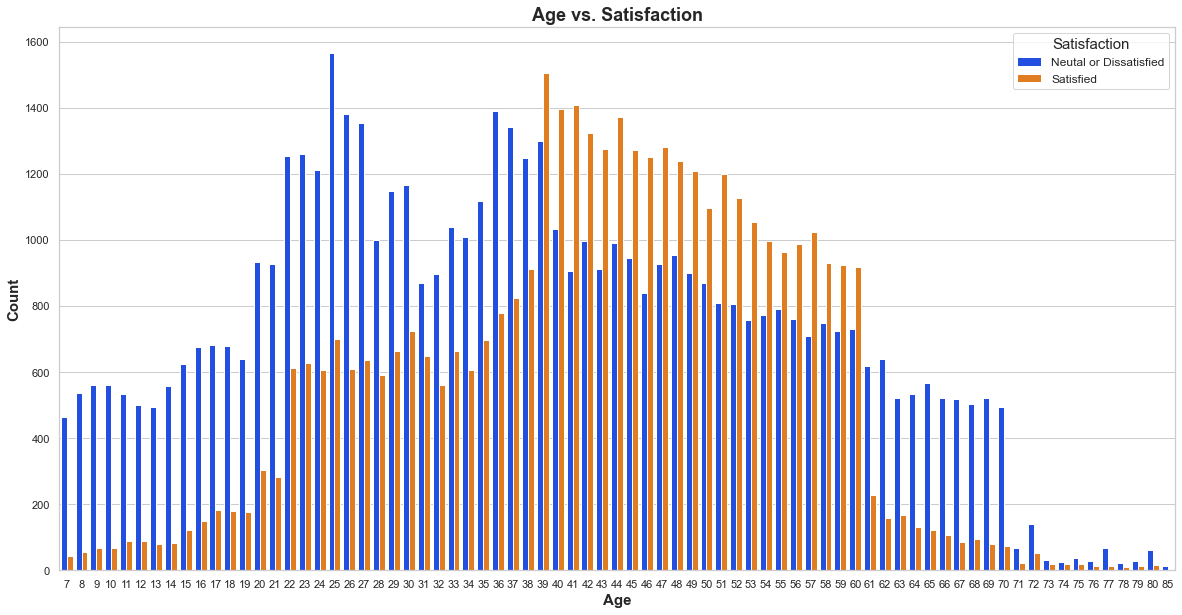

In [32]:
# Create a countplot of age vs. satisfaction with side-by-side bars
plt.figure(figsize=(20, 10))

ax = sns.countplot(x='age', hue='satisfaction', data=data, palette='bright', dodge=True)

# Add labels and title
plt.xlabel("Age", fontweight='bold', fontsize='15')
plt.ylabel("Count", fontweight='bold', fontsize='15')
plt.title("Age vs. Satisfaction", fontweight='bold', fontsize='18')


# Customize the legend
ax.legend(handles, ['Neutal or Dissatisfied', 'Satisfied'], fontsize='12', title='Satisfaction', title_fontsize='15')


# Show the plot
plt.show()

## Feature Selection
- Feature selection is an important process for several reasons:
    - Improves model performance. 
        - You want to remove irrelevant features. 
    - Reduces overfitting. 
        - Too many features can lead to overfitting.
    - Reducing computational time and storage requirements. 
    - Improving interpretability. 
        - Using fewer features can make the model easier to understand. 

### One-Hot Encoding
- First step is to one-hot encode the categorical variables in my dataset. 
- The new variable called data_clean is the new dataframe with the one-hot encoded variables. Once the the new dummy variables were created, the original variables were dropped from the dataset. 

In [33]:
# Combine Eco and Eco plus
data['class'] = data['class'].map({'Eco':'Economy','Eco Plus':'Economy','Business':'Business'})

- Since Eco plus makes up such a small portion of the data, and in essence is still technically economy class, I will combine the two elements to make it easier to read and model.

In [34]:
data_clean = pd.get_dummies(data, columns=['gender', 'customer_type', 'type_of_travel', 'class'], drop_first=True)
data_clean.head()

,age,flight_distance,inflight_wifi_service,departure/arrival_time_convenience,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room,baggage_handling,checkin_service,inflight_service,cleanliness,satisfaction,total_delay_in_minutes,gender_Male,customer_type_Returning Customer,type_of_travel_Personal Travel,class_Economy
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,0,43.0,1,1,1,1
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,0,7.0,1,0,0,0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,1,0.0,0,1,0,0
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,0,20.0,0,1,0,0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,1,0.0,1,1,0,0


In [35]:
# Remove satisfaction column and save it to a new variable
satisfaction = data_clean.pop('satisfaction')

# Insert satisfaction column at new position
data_clean.insert(0, 'satisfaction', satisfaction)

#### Correlation Matrix and Heatmap
- This is the next step of feature selection.
- When reading a heat map and correlation matrix, you want to look at each coordinate and select the largest numbers. 
    - The closer the number is to 1, the higher the correlation, making it a strong feature to select for you modeling. 

In [36]:
corr_matrix = data_clean.corr()
corr_matrix

,satisfaction,age,flight_distance,inflight_wifi_service,departure/arrival_time_convenience,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room,baggage_handling,checkin_service,inflight_service,cleanliness,total_delay_in_minutes,gender_Male,customer_type_Returning Customer,type_of_travel_Personal Travel,class_Economy
satisfaction,1.000000,0.155291,0.307627,0.374004,-0.056881,0.230243,0.004567,0.226694,0.569430,0.374924,0.438129,0.349038,0.345042,0.272755,0.242945,0.268044,0.327679,-0.054974,0.012625,0.217887,-0.462451,-0.508958
age,0.155291,1.000000,0.083363,0.023109,-0.011460,0.026956,-0.005466,0.017677,0.190345,0.155160,0.075726,0.070357,0.056431,-0.035891,0.044719,-0.038502,0.046946,-0.014646,0.006507,0.251265,-0.066909,-0.140104
flight_distance,0.307627,0.083363,1.000000,0.011586,-0.072796,0.057650,0.002655,0.057455,0.199738,0.157091,0.132071,0.119710,0.137805,0.073112,0.079917,0.066930,0.093065,-0.001944,0.007194,0.204774,-0.276187,-0.469375
inflight_wifi_service,0.374004,0.023109,0.011586,1.000000,0.390282,0.676456,0.379486,0.151982,0.454519,0.147826,0.228663,0.129014,0.159638,0.120116,0.058523,0.108991,0.157365,-0.027870,0.007524,0.020267,-0.123779,-0.046449
departure/arrival_time_convenience,-0.056881,-0.011460,-0.072796,0.390282,1.000000,0.517038,0.522019,-0.005109,0.058128,-0.009288,-0.031353,0.079724,-0.000964,0.083078,0.121005,0.084501,0.005864,-0.006328,0.006220,0.104870,0.263053,0.126384
ease_of_online_booking,0.230243,0.026956,0.057650,0.676456,0.517038,1.000000,0.528109,0.030238,0.351420,0.035177,0.037058,0.032706,0.084542,0.023779,0.020231,0.022601,0.019714,-0.014085,0.006227,0.038174,-0.129364,-0.114998
gate_location,0.004567,-0.005466,0.002655,0.379486,0.522019,0.528109,1.000000,-0.001791,-0.002154,0.003050,0.003097,-0.028490,-0.005546,0.004998,-0.034374,0.003467,-0.003667,0.004770,0.001128,-0.011735,-0.032942,-0.004393
food_and_drink,0.226694,0.017677,0.057455,0.151982,-0.005109,0.030238,-0.001791,1.000000,0.260004,0.568851,0.613714,0.064299,0.036216,0.038484,0.092128,0.039386,0.646290,-0.026376,0.006644,0.058172,-0.066600,-0.089431
online_boarding,0.569430,0.190345,0.199738,0.454519,0.058128,0.351420,-0.002154,0.260004,1.000000,0.451081,0.317119,0.178441,0.143290,0.104714,0.228033,0.095536,0.362353,-0.031838,-0.040871,0.190449,-0.222466,-0.327725
seat_comfort,0.374924,0.155160,0.157091,0.147826,-0.009288,0.035177,0.003050,0.568851,0.451081,1.000000,0.612342,0.145727,0.117996,0.087546,0.201120,0.082793,0.674817,-0.031446,-0.026415,0.155211,-0.133203,-0.240641


#### Heatmap
- The heat map is a more visually appeasing version of a correlation matrix. The lighter the color is, the weaker the relationship is. 
- In this case I visually detect 5 variables that have weak relationships with our target variable, 'satisfaction'.
    - **age**
    - **departure/arrival_time_convenience**
    - **gate_location**
    - **total_delay_in_minutes**
    - **gender_Male**

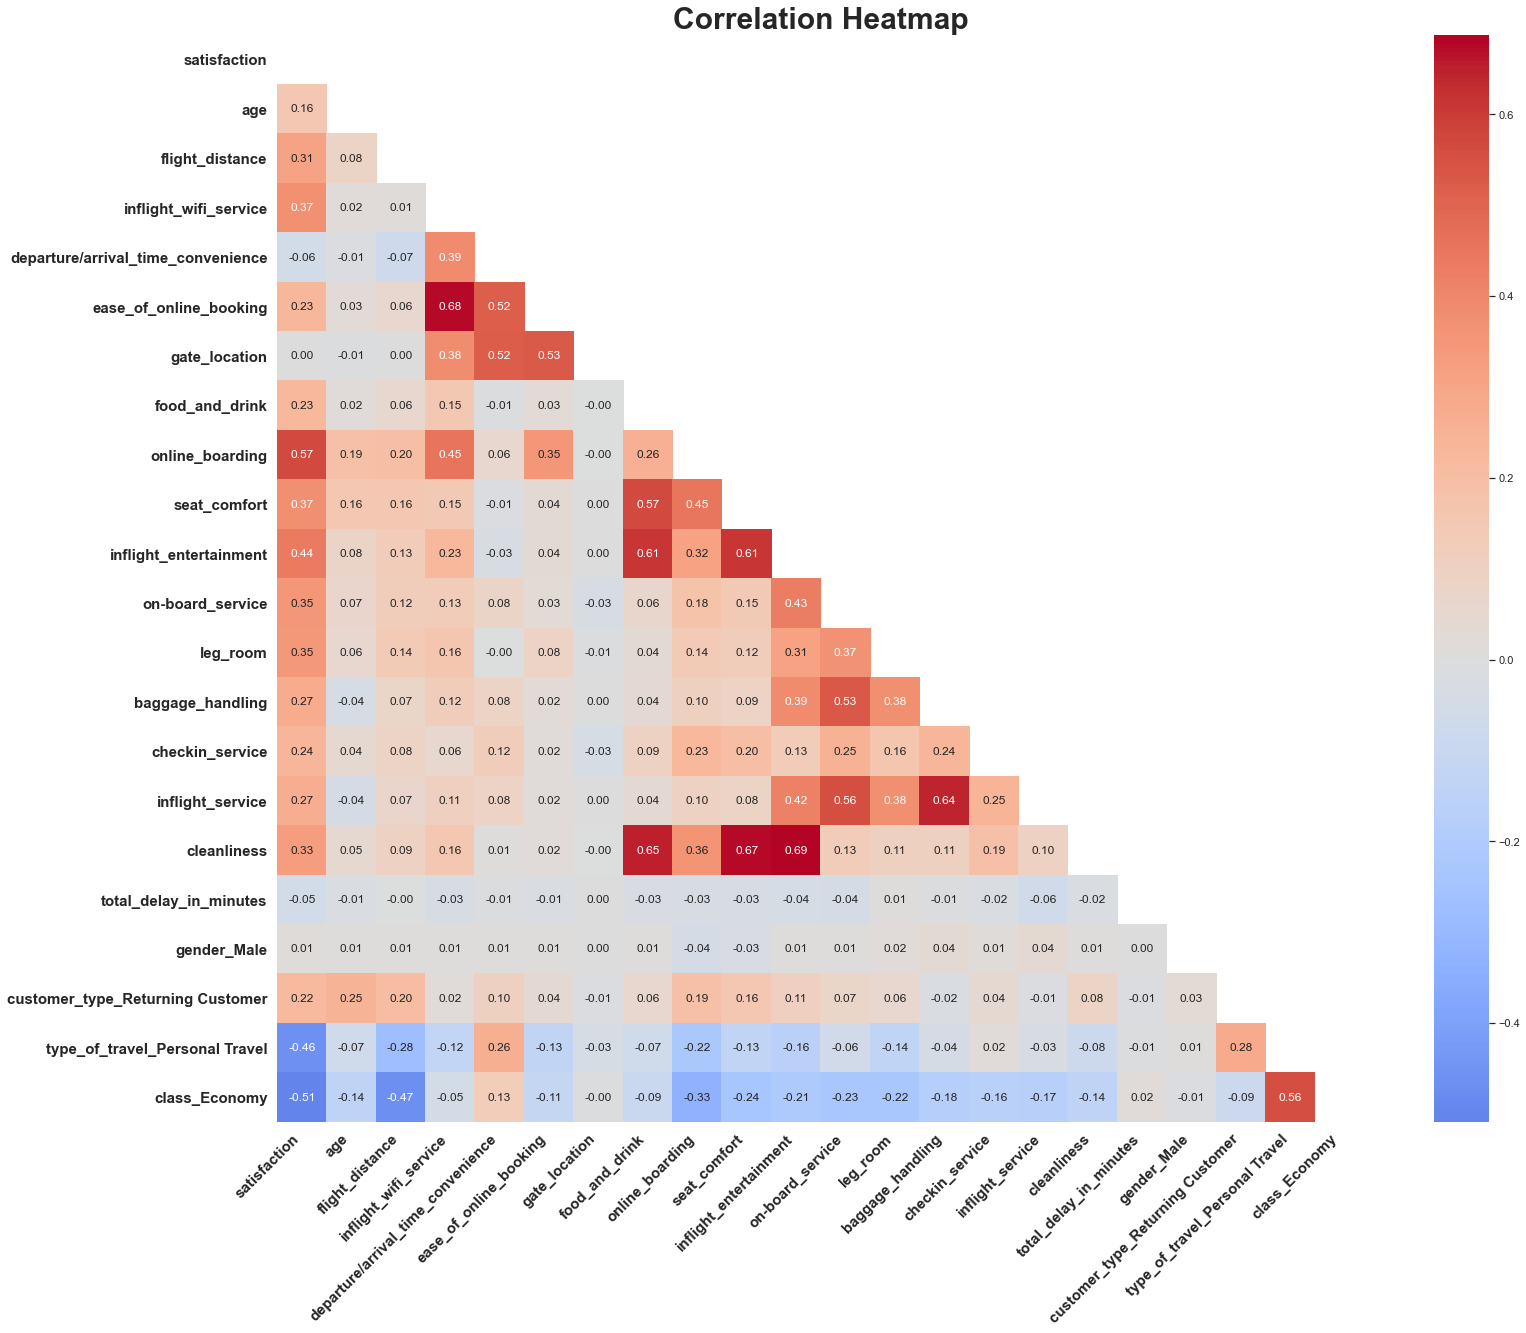

In [37]:
fig, ax = plt.subplots(figsize=(25,20))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize='15', fontweight='bold')
ax.set_yticklabels(ax.get_yticklabels(), fontsize='15', fontweight='bold')
plt.title('Correlation Heatmap', fontweight='bold', fontsize = '30')

plt.show()

In [38]:
satisfaction_corr = data_clean.corr()['satisfaction'].map(abs).sort_values(ascending=False)
satisfaction_corr

satisfaction                          1.000000
online_boarding                       0.569430
class_Economy                         0.508958
type_of_travel_Personal Travel        0.462451
inflight_entertainment                0.438129
seat_comfort                          0.374924
inflight_wifi_service                 0.374004
on-board_service                      0.349038
leg_room                              0.345042
cleanliness                           0.327679
flight_distance                       0.307627
baggage_handling                      0.272755
inflight_service                      0.268044
checkin_service                       0.242945
ease_of_online_booking                0.230243
food_and_drink                        0.226694
customer_type_Returning Customer      0.217887
age                                   0.155291
departure/arrival_time_convenience    0.056881
total_delay_in_minutes                0.054974
gender_Male                           0.012625
gate_location

- Just to confirm with the heatmap, this list of variables confirms that in fact age, departure/arrival_time_convenience, total_delay_in_minutes, gender_Male, and gate_location have the weakest relationships to our target variable satisfaction. 
- The next step will be to remove these variables from the dataset before we begin modeling.  

#### Drop weak correlated variables

In [39]:
data_clean.drop(['age', 'departure/arrival_time_convenience', 'total_delay_in_minutes', 
                              'gender_Male', 'gate_location'], axis=1, inplace=True)

In [40]:
# Check if columns have been removed from the final dataframe
data_clean.head(1)

,satisfaction,flight_distance,inflight_wifi_service,ease_of_online_booking,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room,baggage_handling,checkin_service,inflight_service,cleanliness,customer_type_Returning Customer,type_of_travel_Personal Travel,class_Economy
0,0,460,3,3,5,3,5,5,4,3,4,4,5,5,1,1,1


## Prepare Data for Modeling
- Create X and Y variables.
    - X = independent variables.
    - y = dependent variable.
- Split the data in 80/20 train/test. 

#### Create X and y variables

In [42]:
# Create X
X = data_clean.drop('satisfaction', axis=1)

# Create y
y = data_clean['satisfaction']



#### Perform train/test split 

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Baseline Model : Logistic Regression

In [60]:
# Initialize Logistic Regression
logreg = LogisticRegression(solver = 'liblinear', random_state=42)

# Fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

#### Get Predicitions

In [61]:
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

#### Classification Report of the Training Data

In [62]:
display(confusion_matrix(y_train, y_hat_train))
print(classification_report(y_train, y_hat_train))

array([[37442,  3545],
       [ 3932, 26642]])

              precision    recall  f1-score   support

           0       0.90      0.91      0.91     40987
           1       0.88      0.87      0.88     30574

    accuracy                           0.90     71561
   macro avg       0.89      0.89      0.89     71561
weighted avg       0.90      0.90      0.90     71561



In [63]:
print(data_clean.columns)

Index(['satisfaction', 'flight_distance', 'inflight_wifi_service',
       'ease_of_online_booking', 'food_and_drink', 'online_boarding',
       'seat_comfort', 'inflight_entertainment', 'on-board_service',
       'leg_room', 'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'customer_type_Returning Customer',
       'type_of_travel_Personal Travel', 'class_Economy'],
      dtype='object')
